# Effect of AC-coupling on a squarewave

## Configuration

We simulate the effect of a RC circuit composed by a resistor of 50kOhms and a capacitor of 1uF on a 20Hz square wave.

In [7]:
import matplotlib.pyplot as pp
import numpy as np
import scipy.fftpack

R = 200.0e3   # 200 kOhms
C = 1.0e-6    # 1 uF
f = 20.0      # frequency, Hz
a = 1.0       # half-amplitude, without unit; total amplitude will be from -a to +a
p = 1.0 / f   # period, s
periods = 4   # how many periods to show

samples = 10240                   # Number of samplepoints
spacing = p * periods / samples   # sample spacing; must be smaller than 1/(2 * max_freq)

t = np.linspace(0.0, samples * spacing, samples, endpoint=False)   # Return evenly spaced numbers over a specified interval.

# square = a * np.sign(np.sin(2 * np.pi * t * f))

# fig1, signal = pp.subplots(nrows=1, ncols=1, figsize=(8, 4))
# signal.plot(t, square)
# signal.grid()

## Some utilities

In [2]:
def get_squarewave(a, f, t):    
    return a * np.sign(np.sin(2 * np.pi * f * t))

def get_RC_discharge(R, C, t):
    tau = R*C
    return np.exp(-(np.mod(t-0.00000001, p/2)) / tau)

def plot(t, data, axes, title=''):
    axes.plot(t, data)
    axes.set_title("%rHz Square wave" % f)
    axes.grid(True)

## Plots

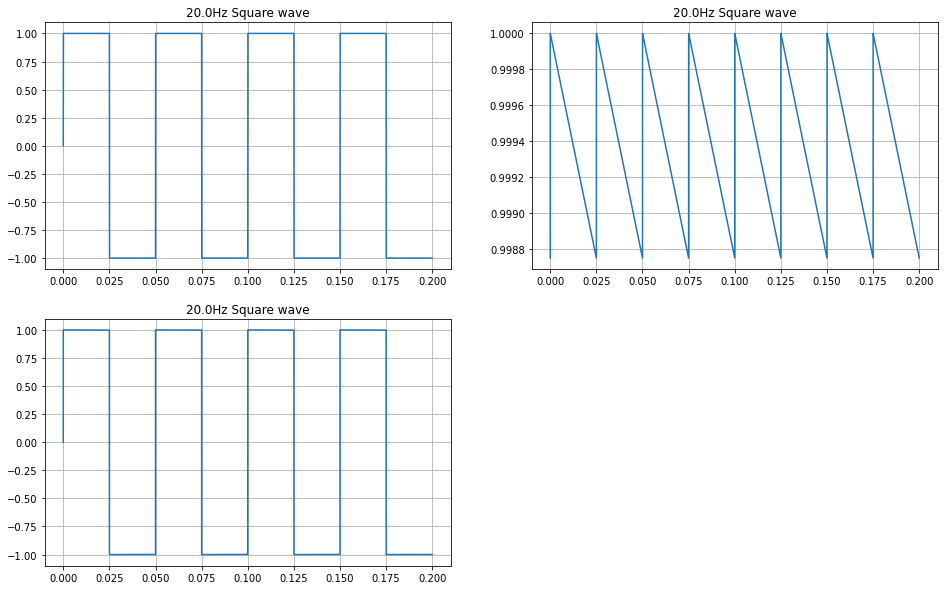

In [3]:
square = get_squarewave(a, f, t)
discharge = get_RC_discharge(R, C, t)

fig2, ((wave, disch), (result, _)) = pp.subplots(nrows=2, ncols=2, figsize=(16, 10))
fig2.delaxes(_)   

plot(t, square, wave, "%rHz Square wave" % f)
plot(t, discharge, disch, "Capacitor discharge")
plot(t, square * discharge, result, "Square wave affected by the capacitor discharge")

## FFT

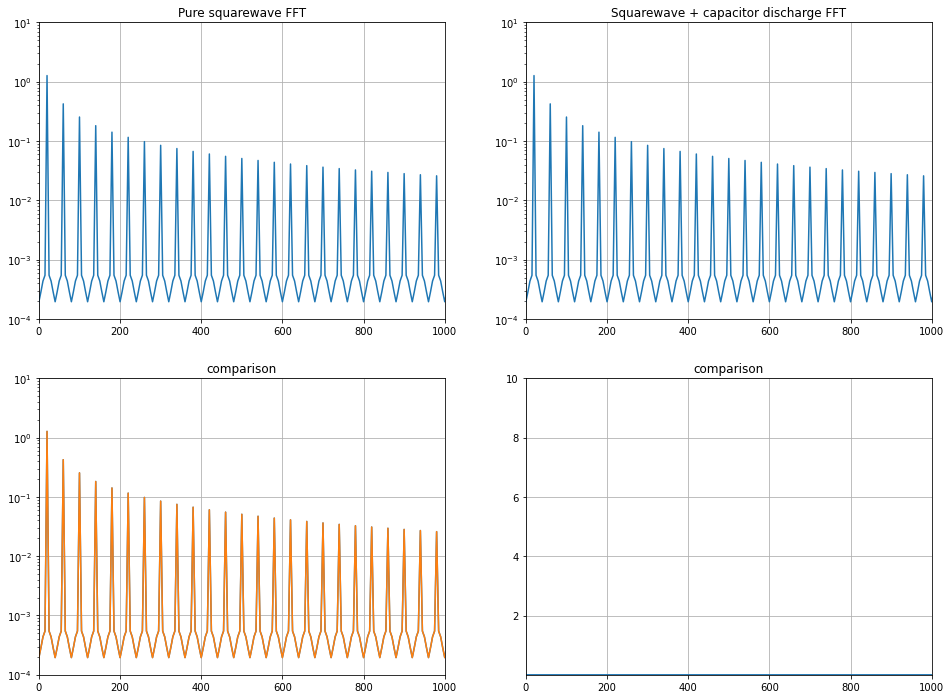

In [4]:
def plot_fft(x, f, axes, title=''):
    y = scipy.fft.fft(f)
    samples = len(y)
    axes.semilogy(x, 2.0/samples * np.abs(y[0:samples//2]))
    # axes.plot(x, 2.0/samples * np.abs(y[0:samples//2]))
    axes.set_xlim(left=0, right=1000)
    axes.set_ylim(10e-5, 10)
    axes.set_title(title)
    axes.grid(True)

def plot_fft_diff(x, f1, f2, axes, title=''):
    y1 = scipy.fft.fft(f1)
    y2 = scipy.fft.fft(f2)
    samples = len(y1)
    # len(y2) must be equal to len(y1)
    # print(2.0/samples * (np.abs(y1[0:samples//2])))
    # print(2.0/samples * (np.abs(y2[0:samples//2])))
    # print(2.0/samples * (np.abs(y1[0:samples//2]) - np.abs(y2[0:samples//2])))
    # for n in range(0, 100):
        # print(np.abs(y1[n]), np.abs(y2[n]), np.abs(y1[n]) - np.abs(y2[n]))
    axes.plot(x, 2.0/samples * (np.abs(y1[0:samples//2]) - np.abs(y2[0:samples//2])))
    axes.set_xlim(left=0, right=1000)
    axes.set_ylim(10e-5, 10)
    axes.set_title(title)
    axes.grid(True)
    
fig3, ((fft11, fft12), (fft21, _)) = pp.subplots(nrows=2, ncols=2, figsize=(16, 12))
# fig3.delaxes(_)    
    
xf = scipy.fft.fftfreq(samples, spacing)[:samples//2]

plot_fft(xf, square, fft11, 'Pure squarewave FFT')
plot_fft(xf, square * discharge, fft12, 'Squarewave + capacitor discharge FFT')
plot_fft(xf, square, fft21, 'comparison')
plot_fft(xf, square * discharge, fft21, 'comparison')
plot_fft_diff(xf, square, square * discharge, _, 'comparison')

## Change the RC values:

In [5]:
R = 1.0e3    # 1 kOhms
C = 1.0e-6   # 1 uF

# square = get_squarewave(a, f, t)
discharge = get_RC_discharge(R, C, t)


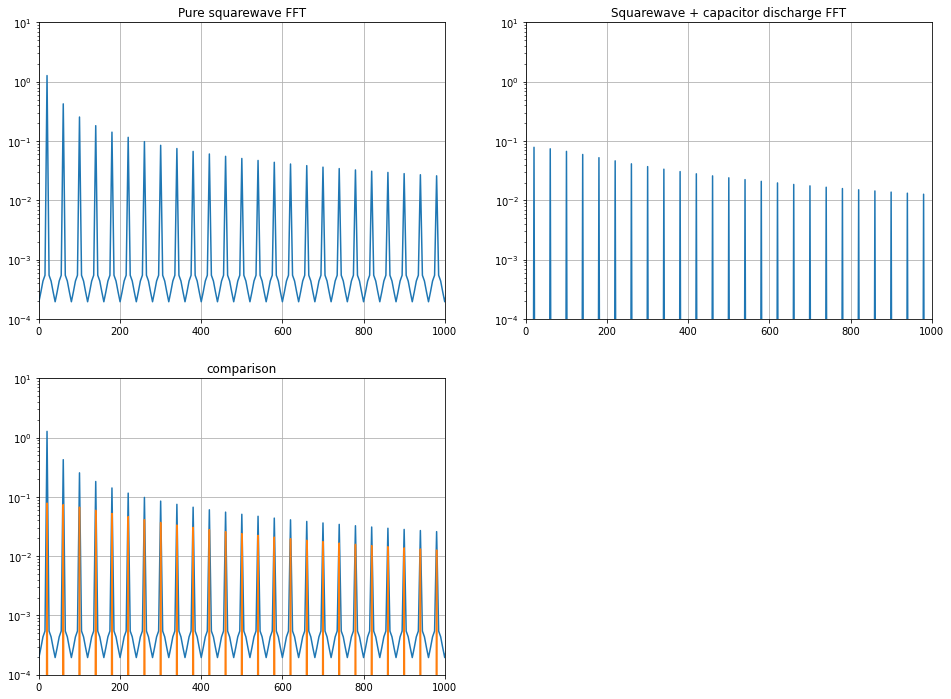

In [6]:
def plot_fft(x, f, axes, title=''):
    y = scipy.fft.fft(f)
    samples = len(y)
    axes.semilogy(x, 2.0/samples * np.abs(y[0:samples//2]))
    axes.set_xlim(left=0, right=1000)
    axes.set_ylim(10e-5, 10)
    axes.set_title(title)
    axes.grid(True)
    
fig4, ((fft11, fft12), (fft21, _)) = pp.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig4.delaxes(_)    
    
xf = scipy.fft.fftfreq(samples, spacing)[:samples//2]

plot_fft(xf, square, fft11, 'Pure squarewave FFT')
plot_fft(xf, square * discharge, fft12, 'Squarewave + capacitor discharge FFT')
plot_fft(xf, square, fft21, 'comparison')
plot_fft(xf, square * discharge, fft21, 'comparison')